In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

print('setup completed')


setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Icecream Sales wr Rain and Temperature.csv'
df = pd.read_csv(file_path)

df.head()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


In [ ]:
df.isna().sum()
df.duplicated().sum()
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(',','')
df.head()

,temperature_(f),ice-cream_price_($),number_of_tourists_(thousands),ice_cream_sales_($thousands),did_it_rain_on_that_day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


In [ ]:
df['did_it_rain'] = df['did_it_rain_on_that_day?']
def did_it_rain_num(x):
  return 1 if x == 'Yes' else 0

df['did_it_rain'] = df['did_it_rain'].apply(did_it_rain_num)
df.head()

,temperature_(f),ice-cream_price_($),number_of_tourists_(thousands),ice_cream_sales_($thousands),did_it_rain_on_that_day?,did_it_rain
0,80.6,1.0,89.5,90,No,0
1,75.2,1.0,86.4,85,No,0
2,86.0,2.0,99.2,107,No,0
3,75.2,2.0,72.4,71,Yes,1
4,60.8,2.0,71.2,65,Yes,1


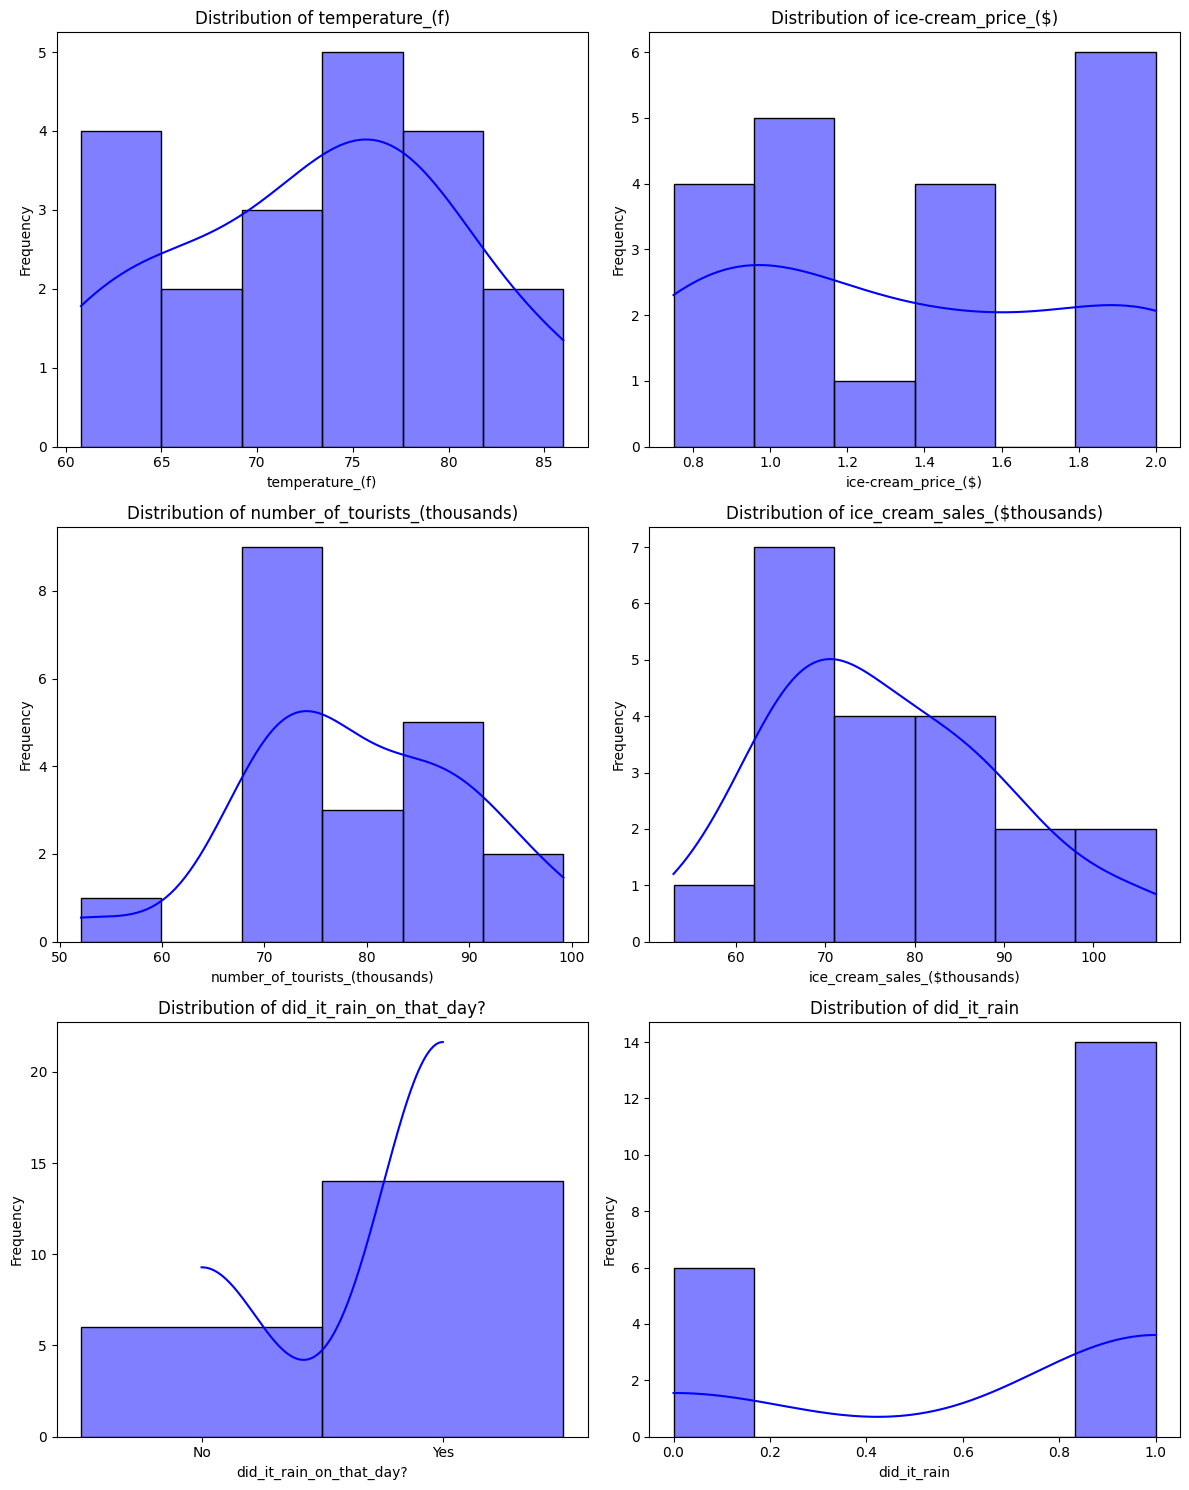

In [ ]:
num_var = len(df.columns)
cols = 2
rows = (num_var // cols) + ( num_var % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize =(12, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
  sns.histplot(df[col], ax = axes[i], kde = True, color = 'blue')
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_ylabel('Frequency')

for j in range (i + 1, len(axes)):
  plt.delaxes(axes[j])

plt.tight_layout()
plt.show()

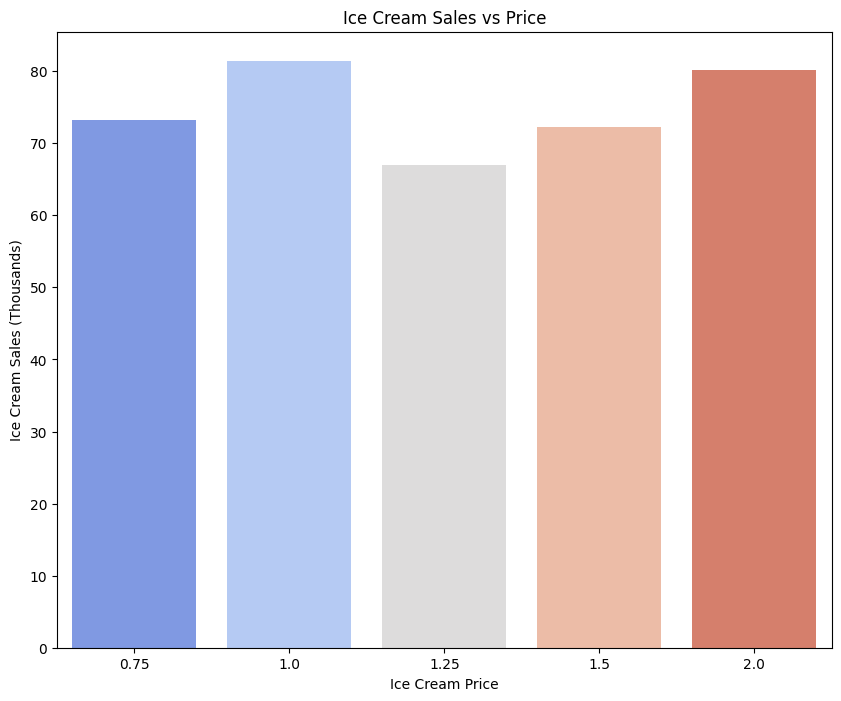

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(
    data = df,
    x = 'ice-cream_price_($)',
    y = 'ice_cream_sales_($thousands)',
    palette = 'coolwarm',
    errorbar = None,
)
plt.title('Ice Cream Sales vs Price')
plt.xlabel('Ice Cream Price')
plt.ylabel('Ice Cream Sales (Thousands)')

plt.show()

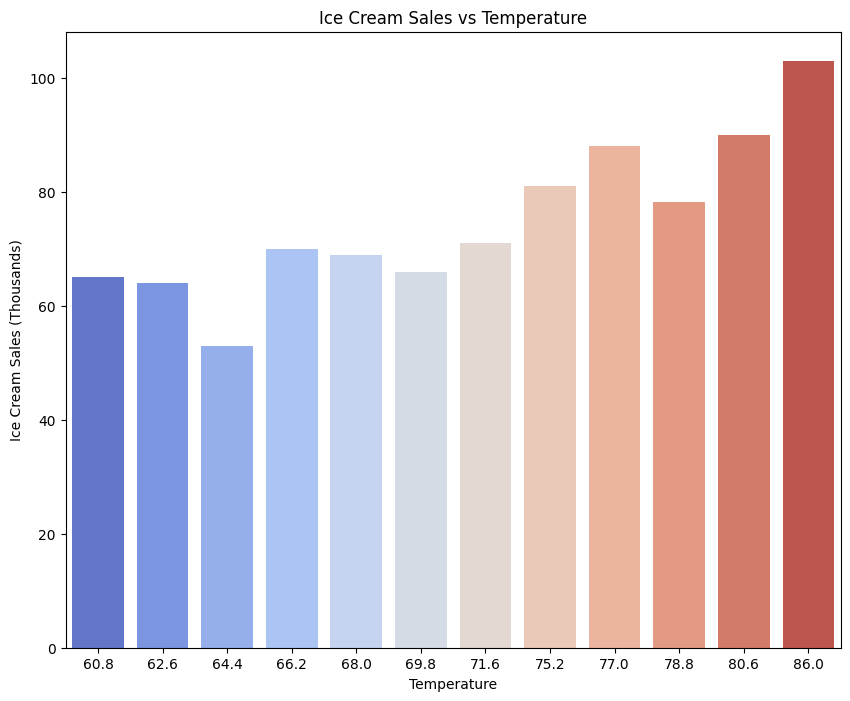

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(
    data = df,
    x = 'temperature_(f)',
    y = 'ice_cream_sales_($thousands)',
    palette = 'coolwarm',
    errorbar = None,
)

plt.title('Ice Cream Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales (Thousands)')
plt.show()

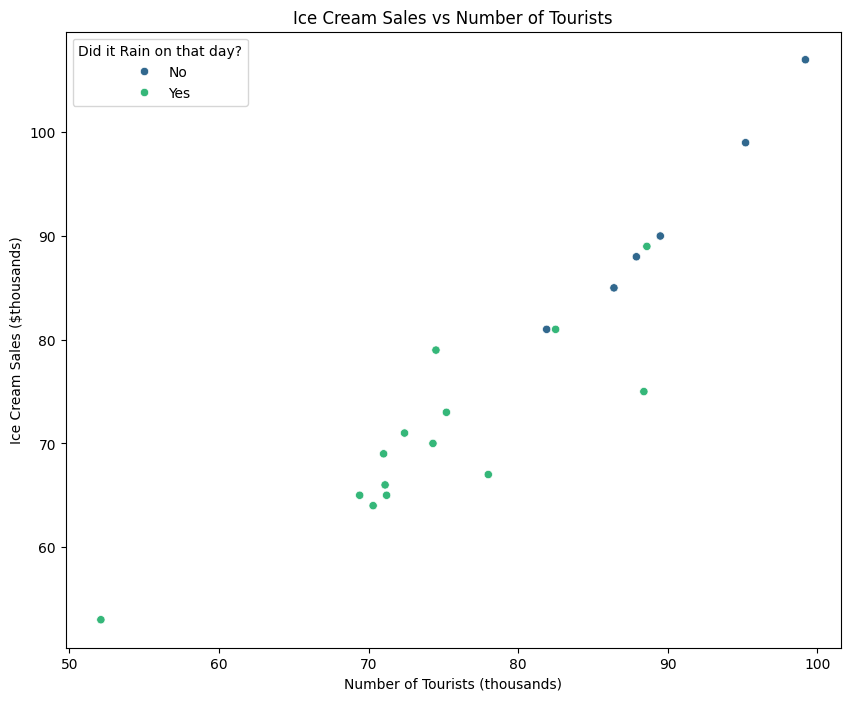

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data = df,
    x = 'number_of_tourists_(thousands)',
    y = 'ice_cream_sales_($thousands)',
    hue = 'did_it_rain_on_that_day?',
    palette = 'viridis'
)

plt.xlabel('Number of Tourists (thousands)')
plt.ylabel('Ice Cream Sales ($thousands)')
plt.title('Ice Cream Sales vs Number of Tourists')
plt.legend(title = 'Did it Rain on that day?', loc = 'upper left')
plt.show()

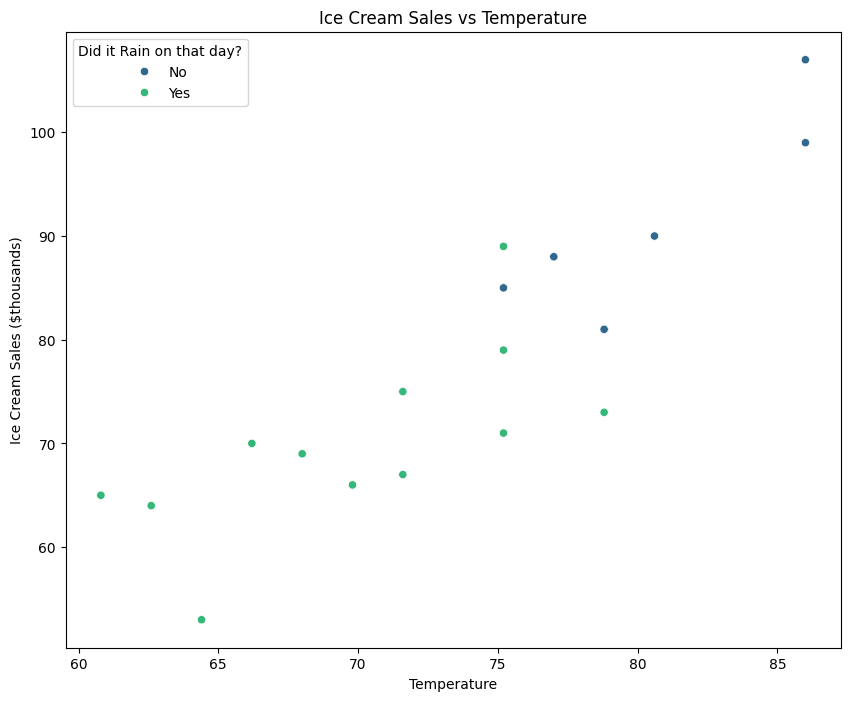

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x = 'temperature_(f)',
    y = 'ice_cream_sales_($thousands)',
    hue = 'did_it_rain_on_that_day?',
    palette = 'viridis'
)

plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales ($thousands)')
plt.title('Ice Cream Sales vs Temperature')
plt.legend(title = 'Did it Rain on that day?', loc = 'upper left')

plt.show()

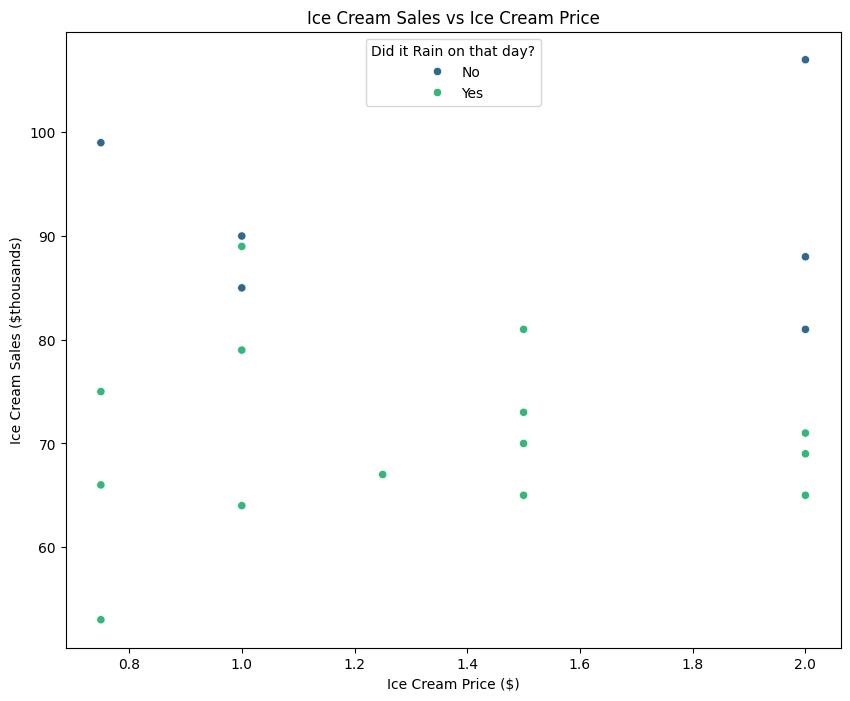

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x = 'ice-cream_price_($)',
    y = 'ice_cream_sales_($thousands)',
    hue = 'did_it_rain_on_that_day?',
    palette = 'viridis'
)

plt.xlabel('Ice Cream Price ($)')
plt.ylabel('Ice Cream Sales ($thousands)')
plt.title('Ice Cream Sales vs Ice Cream Price')
plt.legend(title = 'Did it Rain on that day?', loc = 'upper center')

plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number])

numerical_columns.corr()

,temperature_(f),ice-cream_price_($),number_of_tourists_(thousands),ice_cream_sales_($thousands),did_it_rain
temperature_(f),1.000000,0.039864,0.779084,0.862798,-0.660333
ice-cream_price_($),0.039864,1.000000,0.045092,0.094629,-0.129634
number_of_tourists_(thousands),0.779084,0.045092,1.000000,0.933405,-0.675883
ice_cream_sales_($thousands),0.862798,0.094629,0.933405,1.000000,-0.750530
did_it_rain,-0.660333,-0.129634,-0.675883,-0.750530,1.000000


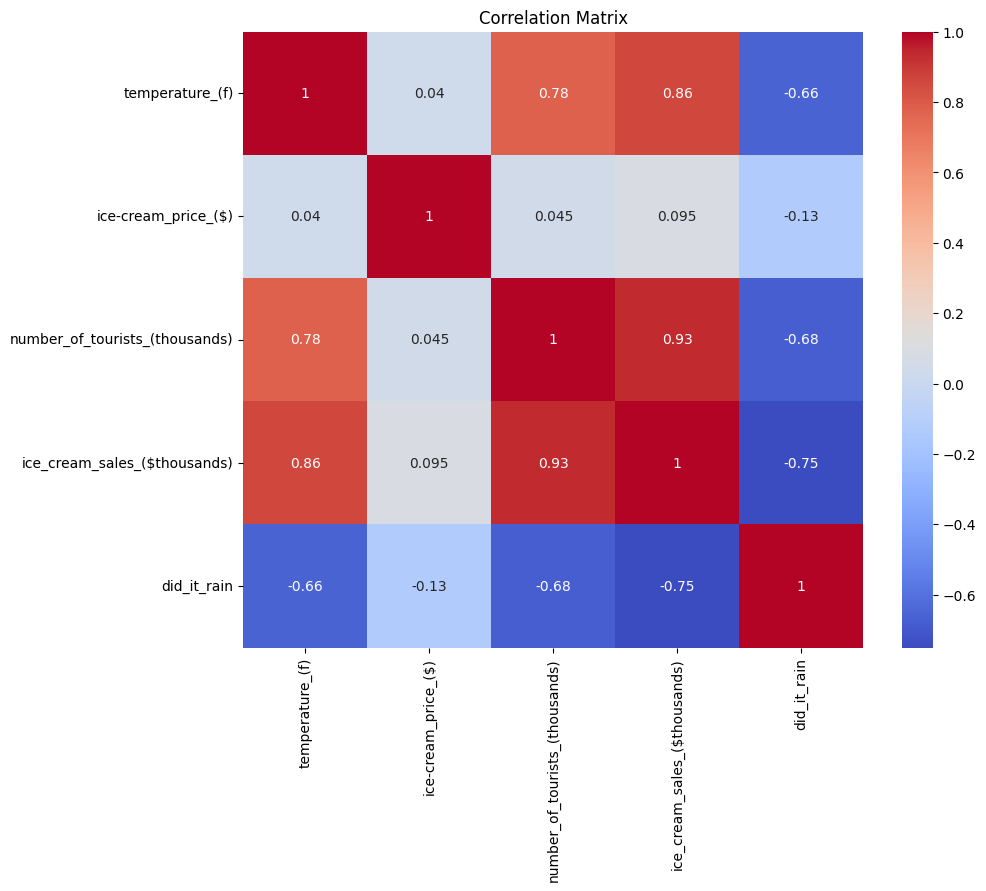

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(
    numerical_columns.corr(),
    annot = True,
    cmap = 'coolwarm'
)

plt.xlabel('')
plt.ylabel('')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Data Modeling without Scalling the dataframe
y = df['ice_cream_sales_($thousands)']
X = df[['temperature_(f)','ice-cream_price_($)','number_of_tourists_(thousands)','did_it_rain']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=19),
    'Decision Tree': DecisionTreeRegressor(random_state=19)
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred1 = model.predict(X_test)

  mse = mean_squared_error(y_test,y_pred1)
  r2 = r2_score(y_test,y_pred1)

  print(f'Model: {name}')
  print(f'Mean Squared Error: {mse:.2f}')
  print(f'R2 Score: {r2:.2f}\n')

Model: Linear Regression
Mean Squared Error: 29.65
R2 Score: -1.34

Model: Random Forest
Mean Squared Error: 48.97
R2 Score: -2.86

Model: Decision Tree
Mean Squared Error: 94.50
R2 Score: -6.45



In [ ]:
#Data Modelling applying scaler
y = df['ice_cream_sales_($thousands)']
X = df[['temperature_(f)','ice-cream_price_($)','number_of_tourists_(thousands)','did_it_rain']]


# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=19)

# Testar diferentes modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=19),
    "Decision Tree": DecisionTreeRegressor(random_state=19),
}

# Avaliação dos modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2: {r2:.2f}\n")

Model: Linear Regression
Mean Squared Error: 29.65
R2: -1.34

Model: Random Forest
Mean Squared Error: 48.78
R2: -2.84

Model: Decision Tree
Mean Squared Error: 88.25
R2: -5.96

